In [1]:
# import libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# load dataset
dataset = load_boston()

In [3]:
# process dataset
feature = pd.DataFrame(dataset.data,columns=dataset.feature_names)
target = dataset.target

In [4]:
feature.drop(['CRIM','ZN','INDUS','CHAS','NOX','DIS','RAD','TAX','PTRATIO','B'],axis=1, inplace=True)
feature.head(5)

,RM,AGE,LSTAT
0,6.575,65.2,4.98
1,6.421,78.9,9.14
2,7.185,61.1,4.03
3,6.998,45.8,2.94
4,7.147,54.2,5.33


In [5]:
feature.shape

(506, 3)

In [6]:
target.shape

(506,)

In [7]:
## feature scaling for fast converge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scale = scaler.fit_transform(feature)
Std_feature = pd.DataFrame(feature_scale,columns=['RM',"AGE","LSTAT"])
Std_feature.head()

,RM,AGE,LSTAT
0,0.413672,-0.120013,-1.075562
1,0.194274,0.367166,-0.492439
2,1.282714,-0.265812,-1.208727
3,1.016303,-0.809889,-1.361517
4,1.228577,-0.511180,-1.026501


In [8]:
#split dataset to training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scale, target, test_size = 0.3, random_state=1)
print("length of training data:",len(X_train))
print("length of testing data:",len(X_test))
print("total samples:",len(X_train) + len(X_test) )

length of training data: 354
length of testing data: 152
total samples: 506


In [9]:
print(X_train[:5])

[[-0.47816444 -0.24091936 -0.6157923 ]
 [-0.45394524  0.88279471  0.25048169]
 [ 0.72567214  1.0748218   1.20366341]
 [ 0.44216506 -1.66334224 -1.168077  ]
 [-3.88024936  0.68721157 -0.77559041]]


In [10]:
# gradient descent implementation
def linear_regression(train_data, test_data, w0=0, w1=0, w2=0, w3=0, max_iter=300, eta=0.01):
    N = len(train_data)
    J = []
    I = []
    for i in range(0, max_iter):
        y_hat = w0 + np.dot(train_data[:,0],w1) + np.dot(train_data[:,1],w2) + np.dot(train_data[:,2],w3)
        error = test_data - y_hat
        #print(error)
        error = error.reshape(error.shape[0],1)
        w1 = float(w1 + eta/N * error.T.dot(train_data[:,0]))
        w2 = float(w2 + eta/N * error.T.dot(train_data[:,1]))
        w3 = float(w3 + eta/N * error.T.dot(train_data[:,2]))
        w0 = float(w0 + eta/N * error.sum())
        result = np.array([w0, w1, w2, w3])
        J.append(1/(2*N) * (error**2).sum())
        I.append(i+1)
    return result, J, I

In [11]:
# final parameters array, cost function list, and iteration list
result, J, I = linear_regression(X_train, y_train)

In [12]:
print(J[0])

290.128545198


In [13]:
print(len(I))

300


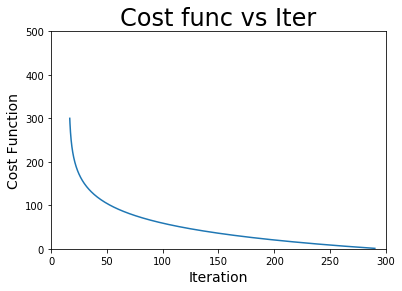

In [14]:
# plot cost function vs iteration
plt.title("Cost func vs Iter",fontsize=24)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Cost Function",fontsize=14)
plt.xlim(0, len(I))
plt.ylim(0, 500)
plt.plot(J,I)
plt.show()

In [15]:
# final w0, w1, w2, w3
print(result)

[ 21.52061592   3.10406642  -0.68372253  -3.97133458]


In [16]:
result = result.reshape(result.shape[0],1)

In [17]:
# add 1 to the first column to compute y_pred
b = np.ones(len(X_test))
X_test = np.insert(X_test, 0, values=b, axis=1)

In [18]:
print(X_test[:5])

[[ 1.          0.80402837  0.0613455  -0.71811916]
 [ 1.          0.58605559 -0.43294645 -0.76717998]
 [ 1.         -0.36276709  0.60186619  0.86163938]
 [ 1.         -0.57931521 -1.67756646 -0.6382201 ]
 [ 1.         -1.31443908  0.98236431 -0.34525689]]


In [19]:
# compute y_pred
y_pred = []
for i in range(0, len(X_test)):
    y_pred.append(float(result.T.dot(X_test[i])))
y_pred = np.array(y_pred)
print('First ten predicted values:')
for i in range(0,10): 
    print(y_pred[i])

First ten predicted values:
26.8263215102
26.6825150196
16.5611950338
23.4039585715
18.1399757221
22.0473905676
28.5735540565
19.6008417099
16.4999116283
24.3054863411


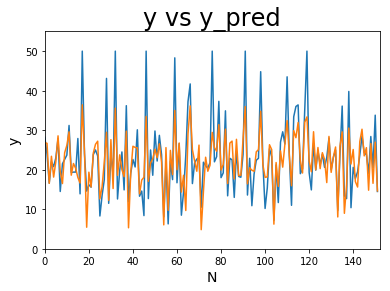

In [20]:

# plot y vs y_pred, blue line is y and organge line is y_pred
plt.title("y vs y_pred",fontsize=24)
plt.xlabel("N",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.xlim(0, 152)
plt.ylim(0,55)
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [21]:
# performance evaluation using RMSE
def compute_RMSE(y, y_pred):
        return sqrt(1/len(y) * ((y - y_pred)**2).sum())

In [22]:
rmse = compute_RMSE(y_test, y_pred)
print(rmse)

5.506609894983426
